In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

# Question 1

## **I** Answer the following high-level questions

The parameters of the model are the clusters proportion $\boldsymbol{\varphi}$ which is a probability vector of size $\boldsymbol{K}$ $\sum_{\text {where }}^K \varphi_k=1$ $\sum_{w \in \mathcal{A}} \mu_{k, w}=1$ , and (2) the word proportion $\boldsymbol{\mu}_k$ corresponding to the $k_{\text {th }}$ face of the dice where face of the dice (or cluster).

The probability of generating a a pair of a document and its cluster ( $k, d$ ), according to our generative story, is

$$
\begin{aligned}
p(k, d)=p(k) p(d \mid k) & =\varphi_k \prod_{w \in d} \mu_{k, w} \\
& =\varphi_k \prod_{w \in \mathcal{A}} \mu_{k, w}^{c(w, d)}
\end{aligned}
$$

where $c(w, d)$ is simply the number of occurrences of the word $w$ in the document $d$

### Complete Data
The Likelihood. Assume that in addition to the documents $\left\{d_1, \ldots, d_N\right\}$, we were also given the values of the corresponding latent variables $\left\{\boldsymbol{z}_1, \ldots, \boldsymbol{z}_N\right\}$, then

$$
p\left(d_1, z_1, \ldots, d_N, z_N\right)=\prod_{n=1}^N \prod_{k=1}^K\left(\varphi_{k_n} \prod_{w \in \mathcal{A}} \mu_{k_n, w}^{c(w, d)}\right)^{z_{n, k}}
$$

where $\boldsymbol{z}_n := \left(z_{n1}, \ldots, z_{nk}\right)$ is the cluster assignment vector for the $n$-th document, in which $z_{nk} = 1$ if this document belongs to cluster $k$, and zero otherwise. Note that only one element of the cluster assignment vector is 1, and the rest are zero. To summarize, the log-likelihood of the complete data is:


$$
\ln p\left(d_1, z_1, \ldots, d_N, z_N\right)=\sum_{n=1}^N \sum_{k=1}^K z_{n, k}\left(\ln \varphi_{k_n}+\sum_{w \in \mathcal{A}} c(w, d) \ln \mu_{k_n, w}\right)
$$





The MLE optimization function for complete data is:
$$
\begin{align*}
    \max_{\varphi, \mu}\sum_{n=1}^{N}\sum_{k=1}^{K}z_{nk} \left(\ln\varphi_k + \sum_{w\in A}{c(w,d) \ln\mu_{k_n,w}}\right)
\end{align*}
$$
Subject to:
$$
\begin{align*}
   \sum_{k=1}^{K}\varphi_k = 1 \text{ and } \sum_{w \in A }\mu_{k,w} = 1 \text{ for each } k
\end{align*}
$$

### Incomplete Data

$$
\begin{aligned}
p\left(d_1, \ldots, d_N\right)=\prod_{n=1}^N p\left(d_n\right) & =\prod_{n=1}^N \sum_{k=1}^K p\left(z_{n, k}=1, d_n\right) \\
& =\prod_{n=1}^N \sum_{k=1}^K\left(\varphi_k \prod_{w \in \mathcal{A}} \mu_{k, w}^{c\left(w, d_n\right)}\right)
\end{aligned}
$$


To summarise, the log-likelihood is:

$$
\begin{aligned}
\ln p\left(d_1, \ldots, d_N\right)=\sum_{n=1}^N \ln p\left(d_n\right) & =\sum_{n=1}^N \ln \sum_{k=1}^K p\left(z_{n, k}=1, d_n\right) \\
& =\sum_{n=1}^N \ln \sum_{k=1}^K\left(\varphi_k \prod_{w \in \mathcal{A}} \mu_{k, w}^{c\left(w, d_n\right)}\right)
\end{aligned}
$$

The MLE optimization function for incomplete data is:
$$
\begin{align*}
\max_{\varphi, \mu}{\sum_{n=1}^{N}\ln \sum_{k=1}^{K}\left(\varphi_k \prod_{w\in A}{\mu_{k,w}^{c(w,d)}}\right)} 
\end{align*}
$$
Subject to:
$$
\begin{align*}
   \sum_{k=1}^{K}\varphi_k = 1 \text{ and } \sum_{w \in A }\mu_{k,w} = 1 \text{ for each } k
\end{align*}
$$




####  Why MLE with incomplete data is hard to optimize?

Maximum Likelihood Estimation (MLE) with incomplete data is challenging to optimize due to several factors:

- Unobserved Variables: Missing values or latent variables add uncertainty, complicating the likelihood calculations.
- Complexity of Likelihood Function: The likelihood function becomes more complex, requiring marginal integration over unobserved data.
- Use of EM Algorithm: While the Expectation-Maximization (EM) algorithm is commonly used, it can converge slowly and relies on iterative estimations.
- Local Optima: The optimization landscape may have multiple local optima, making it hard to find the global maximum.
- Sensitivity to Initial Conditions: The results can vary significantly based on initial parameter estimates.

These factors make MLE with incomplete data more intricate than with complete data, requiring careful handling of unobserved elements and sophisticated optimization strategies.

#### Briefly explain the high-level idea of the EM algorithm to find MLE parameter estimates

The Expectation-Maximization (EM) algorithm is a powerful iterative method used to find Maximum Likelihood Estimation (MLE) parameter estimates, especially when dealing with incomplete or missing data. The algorithm consists of two main steps that are repeated until convergence:

**1. Expectation Step (E-Step):**

- In this step, the algorithm estimates the missing or unobserved data based on the current parameter estimates. It calculates the expected value of the complete data log-likelihood, which includes both the observed data and the estimated missing data. This results in a "soft" assignment of probabilities to the unobserved data points based on the current parameters.

**2. Maximization Step (M-Step):**

- Here, the algorithm updates the parameter estimates by maximizing the expected log-likelihood calculated in the E-step. This involves adjusting the model parameters to best fit the complete data representation that includes both the observed and estimated unobserved data.

**Iterative Process**
- The E and M steps are repeated alternately. In each iteration, the algorithm refines its estimates of the missing data and updates the parameters until convergence is achieved, typically when the changes in the parameters fall below a specified threshold.

**Summary**

The EM algorithm effectively handles incomplete data by iteratively estimating missing values and optimizing parameters, making it suitable for a variety of applications in statistics and machine learning.

### **II** Derive Expectation and Maximization steps

From the above step, we know the likelihood of the observed data is:

$$
\begin{align*}
p(d_1, \dots, d_N) = \prod_{n=1}^{N} p(d_n) &= \prod_{n=1}^{N} \sum_{k=1}^{K} p(z_{n,k}=1, d_n) \\
& = \prod_{n=1}^{N} \sum_{k=1}^{K} \left( \varphi_k \prod_{w \in A}{\mu_{k,w}^{c(w,d_n)}} \right)
\end{align*}
$$

**Step 1: Expectation Step (E-Step)**

In this step, we calculate the expected value of the latent variable, which is the probability that a document belongs to each cluster. This probability is denoted by \(\gamma(z_{n,k})\).


- E-step: Use the current values of the parameters to calculate the posterior probabilities \(\gamma(z_{n,k})\):

$$
\gamma(z_{n,k}) = p(z_{n,k}=1|d_n) = \frac{p(z_{n,k}=1) p(d_n|z_{n,k}=1)}{p(d_n)} 
$$

Where:
- $p(z_{n,k}=1)$ is the prior probability (which is $\varphi_k$).
- $p(d_n|z_{n,k}=1)$ is the likelihood, which is $\prod_{w \in A} \mu_{k,w}^{c(w,d_n)}$.

Thus, $\gamma(z_{n,k})$ becomes:

$$
\gamma(z_{n,k}) = \frac{\varphi_k \prod_{w \in A} \mu_{k,w}^{c(w,d_n)}}{\sum_{j=1}^{K} \varphi_j \prod_{w \in A} \mu_{j,w}^{c(w,d_n)}}
$$

**Step 2: Maximization Step (M-Step)**

In this step, we re-estimate the parameters $\varphi_k$ and $\mu_{k,w}$ based on the soft assignments (probabilities) computed in the E-step.

- M-step: The $Q$ function, which is the basis of our EM Algorithm, is:

$$
Q(\theta,\theta^{\text{old}}) = \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{n,k}) \left( \ln \varphi_k + \sum_{w \in A} c(w,d_n) \ln \mu_{k,w} \right)
$$

Where $\theta = (\varphi, \mu_1, \dots, \mu_K)$.

To maximize the $Q$ function, we form the Lagrangian to enforce constraints.

**Lagrange Multipliers:**

- We want to maximize the objective function, subject to certain constraints.
  
  **Constraints**:
  1. $\sum_{k=1}^{K} \varphi_k = 1$
  2. $\sum_{w \in A} \mu_{k,w} = 1$

The Lagrangian is formed as follows:

$$
\mathcal{L}(\varphi_k, \mu_{k,w}, \lambda_1, \lambda_2) = \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma(z_{n,k}) \left( \ln \varphi_k + \sum_{w \in A} c(w,d_n) \ln \mu_{k,w} \right) - \lambda_1 \left( \sum_{k=1}^{K} \varphi_k - 1 \right) - \lambda_2 \left( \sum_{w \in A} \mu_{k,w} - 1 \right)
$$

**Final Updates:**

When Maximizing with respect to $\varphi_k$ and Maximizing with respect to $\mu_{k,w}$: The updates for the parameters after the E-step and M-step are:

**Cluster Proportions** $\varphi_k$:
1. Maximizing with respect to $\varphi_k$:
Taking the partial derivative of $\mathcal{L}$ with respect to $\varphi_k$:

$$
\frac{\partial \mathcal{L}}{\partial \varphi_k} = \sum_{n=1}^{N} \frac{\gamma(z_{n,k})}{\varphi_k} - \lambda_1 = 0
$$

Solving for $\varphi_k$:

$$
\varphi_k = \frac{1}{\lambda_1} \sum_{n=1}^{N} \gamma(z_{n,k})
$$

Using the constraint $\sum_{k=1}^{K} \varphi_k = 1$, we find that:

$$\sum_{n=1}^{N}\sum_{k=1}^{K}z_{nk} =\sum_{n=1}^{N}1 = N$$
$$
\begin{align*}
&\frac{1}{\lambda_1}N = 1 \\
\Leftrightarrow & \lambda_1 = N 
\end{align*}
$$

Thus, the update for $\varphi_k$ is:

$$
\varphi_k = \frac{1}{N} \sum_{n=1}^{N} \gamma(z_{n,k})
$$

**Word Distributions** $\mu_{k,w}$:
Taking the partial derivative of $\mathcal{L}$ with respect to $\mu_{k,w}$:

$$
\frac{\partial \mathcal{L}}{\partial \mu_{k,w}} = \sum_{n=1}^{N} \frac{\gamma(z_{n,k}) c(w,d_n)}{\mu_{k,w}} - \lambda_2 = 0
$$

Solving for $\mu_{k,w}$:

$$
\mu_{k,w} = \frac{1}{\lambda_2} \sum_{n=1}^{N} \gamma(z_{n,k}) c(w,d_n)
$$

Using the constraint $\sum_{w \in A} \mu_{k,w} = 1$, we find that:
$$
\begin{align*}
&\mu_{k_n,w}  = \sum_{n=1}^{N}z_{nk}{c(w,d) \frac{1}{\lambda_2}} \\
\Leftrightarrow & \sum_{w^{'} \in A}\mu_{k_n,w}  = \sum_{w^{'} \in A}\sum_{n=1}^{N}z_{nk}{c(w^{'},d) \frac{1}{\lambda_2}} = 1 \\
\Leftrightarrow & \lambda_2  = \sum_{w^{'} \in A}\sum_{n=1}^{N}z_{nk}{c(w^{'},d)}
\end{align*}
$$
Thus, the update for $\mu_{k,w}$ is:
$$
\mu_{k,w} = \frac{\sum_{n=1}^{N} \gamma(z_{n,k}) c(w,d_n)}{\sum_{w' \in A} \sum_{n=1}^{N} \gamma(z_{n,k}) c(w',d_n)}
$$


### **III** Load Task2A.txt file

In [2]:
with open('Task2A.txt', 'r') as file:
    text = file.readlines()
all([length == 2 for length in [len(line.split('\t')) for line in text]])
labels, articles = [line.split('\t')[0].strip() for line in text], [line.split('\t')[1].strip() for line in text]
docs = pd.DataFrame(data = zip(labels,articles), columns=['label', 'article'])
docs.label = docs.label.astype('category')
docs.head()

,label,article
0,sci.crypt,ripem frequently asked questions archive name ...
1,sci.crypt,ripem frequently asked questions archive name ...
2,sci.crypt,ripem frequently noted vulnerabilities archive...
3,sci.crypt,certifying authority question answered if you ...
4,sci.crypt,rubber hose cryptanalysis some sick part of me...


In [3]:
cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     min_df=5)

features = cv.fit_transform(raw_documents=docs.article.values)
l2_normalizer = Normalizer(norm = 'l2')
features_norm = l2_normalizer.fit_transform(features.toarray())

In [4]:
# This class will performan EM algorithm with using Log-sum-operation for calculation
class EM_algo:
    def __init__(self, vocab_size, K, tau_max=200, epsilon=0.01, random_state=None):
        self.K = K               # number of document clusters
        self.vocab_size = vocab_size  # Size of the vocabulary (number of words)
        self.tau_max = tau_max   # max number of iterations
        self.epsilon = epsilon  # minimum acceptable error rate
        self.random_state = random_state
        np.random.seed(self.random_state)

    def get_params(self, deep=False):
        return {'K': self.K,
         'tau_max': self.tau_max,
         'epsilon': self.epsilon,
         'random_state': self.random_state}
    
    def __str__(self):
        params = self.get_params()
        return 'EM({0})'.format(','.join(['='.join([key, str(params[key])]) for key in params.keys()]))

    def __repr__(self):
        return self.__str__()

    def logsum(self, v):
        m = np.max(v, axis=0)
        return m + np.log(np.sum(np.exp(v - m), axis=0))

    def fit(self, X, verbose=False, soft=True):
        N, D = X.shape  # N: number of documents, D: document length (number of words)
        
        ## initialization:
        self.psi_with_hat_ = np.array([1/self.K] * self.K)  # Initialize psi_with_hat_ with equal cluster probabilities
        self.mu_with_hat_ = np.random.rand(self.K, self.vocab_size)  # Initialize mu with random values
        self.mu_with_hat_ = self.mu_with_hat_ / np.sum(self.mu_with_hat_, axis=1, keepdims=True)  # normalize mu

        r = np.zeros((N, self.K))  # Posterior probabilities matrix (N x K)

        terminate = False
        tau = 0
        mu_with_hat_old = self.mu_with_hat_  # Store the last iteration's Mu_hat

        while (not terminate):
            # E step:
            r = np.log(self.psi_with_hat_).reshape(-1, 1) + (np.log(self.mu_with_hat_) @ X.T)
            # Perform log-sum-exp operation
            r_log_sum = self.logsum(r)
            # prob of each cluster
            r = np.exp(r - r_log_sum).T
            if not soft:
                # For hard EM, return the argmax cluster assignment for each document
                z_star = np.argmax(r, axis=1)  # Take the argmax over clusters
                r = np.zeros_like(r)  # Reset r
                r[np.arange(N), z_star] = 1  # Set the max cluster to 1 and others to 0

            # M step (updating psi_with_hat_ and mu_with_hat_)
            Nk_hat_ = np.sum(r, axis=0)  # Effective number of points assigned to each cluster
            self.psi_with_hat_ = Nk_hat_ / N  # Update cluster proportions
            
            # Update mu_with_hat_ (word distribution per cluster)
            self.mu_with_hat_ = (X.T @ r).T
            self.mu_with_hat_ = (self.mu_with_hat_ + self.epsilon) / np.sum(self.mu_with_hat_, axis=1,keepdims=True)
            

            tau += 1
            terminate = ((tau == self.tau_max) or np.allclose(self.mu_with_hat_, mu_with_hat_old, rtol=self.epsilon))
            mu_with_hat_old = np.copy(self.mu_with_hat_)  # Store the current Mu_hat for next iteration

            if verbose:
                print(f"Iteration {tau}, Log-Likelihood: {np.sum(np.log(np.sum(r, axis=1)))}")

        if verbose:
            print(f"Converged after {tau} iterations.")
        
        return self

    def predict_proba(self, x):
        r = np.log(self.psi_with_hat_).reshape(-1, 1) + (np.log(self.mu_with_hat_) @ x.T)
        r_log_sum = self.logsum(r)
        
        # Using exp for log-sum-exp to calculate prob 
        r = np.exp(r - r_log_sum).T
        return r

    def predict(self, x):
        probs = self.predict_proba(x)
        preds = np.argmax(probs, axis=1)
        return preds


## V. Performance soft anf har clustering

In [15]:
# Fit vocab 
vocab_size = features_norm.shape[1]
print("Vocab size: ", vocab_size)


Vocab size:  8094


In [16]:
em_algo = EM_algo(vocab_size=vocab_size, K=4, tau_max=50, epsilon=0.00001, random_state=42)
em_soft_cluster = em_algo.fit(features_norm, soft=True).predict(features_norm)
em_hard_cluster = em_algo.fit(features_norm, soft=False).predict(features_norm)

In [17]:
print('Perform soft cluster: \n', em_soft_cluster)
print('Perform hard cluster: \n', em_hard_cluster)

Perform soft cluster: 
 [2 2 2 ... 0 0 0]
Perform hard cluster: 
 [3 3 3 ... 0 3 0]


## Perform PCA

In [6]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

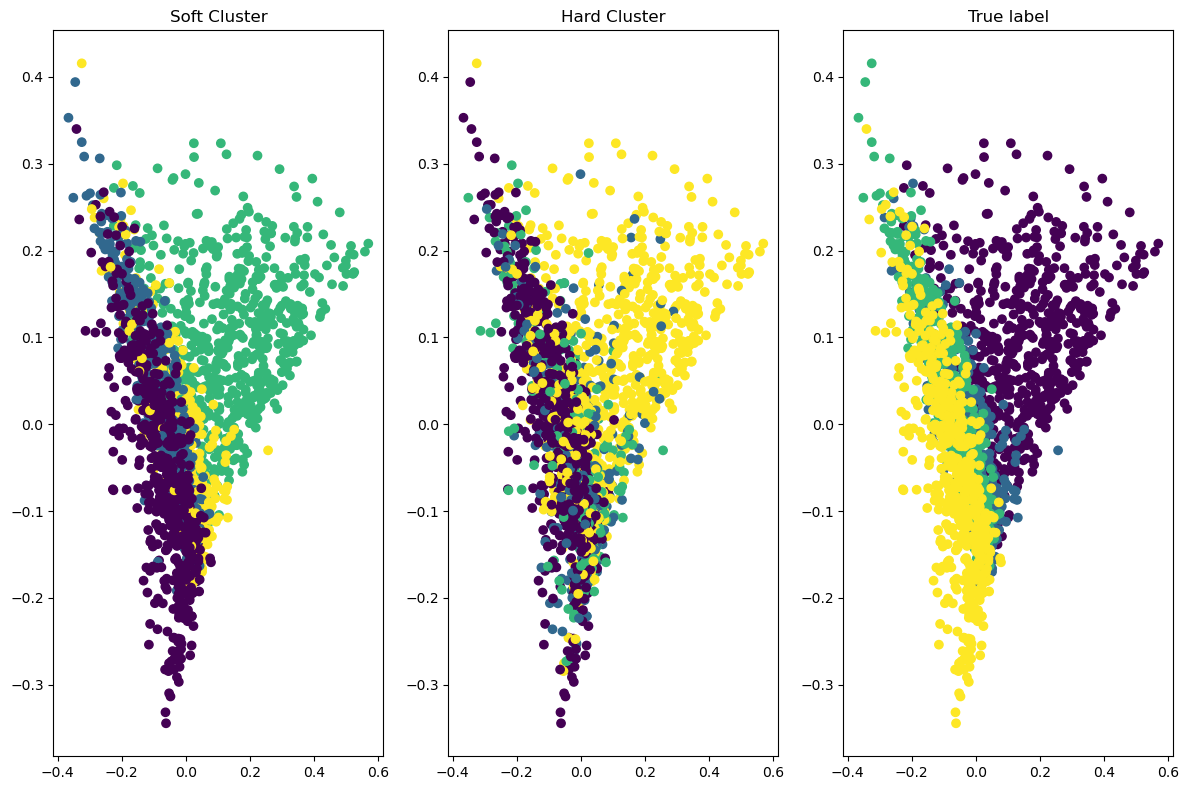

In [18]:
## perform pca
pca = PCA(n_components=2)
_2D_features = pca.fit_transform(features_norm)

## plot the kmeans outcome
_, axs = plt.subplots(1, 3, figsize=(12, 8), tight_layout=True)
axs[0].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=em_soft_cluster)
axs[0].set_title('Soft Cluster')


axs[1].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=em_hard_cluster)
axs[1].set_title('Hard Cluster')


## plot the original data
axs[2].scatter(x=_2D_features[:,0],y=_2D_features[:,1], c=docs.label.cat.codes)
axs[2].set_title('True label')
plt.show()

**Analysis of Soft and Hard Clustering Results**

The provided plots illustrate the differences between soft and hard clustering approaches applied to a dataset, along with a comparison to the true labels.

***Soft Clustering (Left Plot)***

- Soft clustering assigns probabilities to points for belonging to each cluster, resulting in blurred boundaries between clusters. Points near boundaries have mixed memberships, leading to smoother transitions between clusters, as seen in the first plot.

***Hard Clustering (Middle Plot)***
- Hard clustering assigns each point to a single cluster, resulting in clear, rigid boundaries between clusters, as shown in the second plot. This may oversimplify the cluster structure, especially near boundaries.

***True Labels (Right Plot)***
- Ground Truth Comparison: This plot serves as a reference for evaluating the effectiveness of both clustering methods. Misclassifications can be identified when compared to the true labels.

**Conclusion**

- Soft clustering captures the uncertainty in cluster assignment with overlapping boundaries, while Hard clustering forces sharp distinctions, potentially missing nuance in the data.

The differences are clearly seen in the visualizations, with soft clustering showing more overlap and hard clustering presenting distinct separations.